In [1]:
import xgboost
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import pymysql
import numpy as np
import math

from pickle import dump


import datetime
# import timedelta
# 오늘날짜 기준
dt = datetime.datetime.now()
fl_dt = float(str(dt.year) + "." + str(dt.month))

In [7]:
## 지하철역 거리 가져오기 추가
import json
from pandas.io.json import json_normalize

db_con = pymysql.connect(
    user='', 
    passwd='', 
    host='', 
    db='', 
    charset=''
)

cursor = db_con.cursor(pymysql.cursors.DictCursor)

sql = """
"""

cursor.execute(sql)
result_0 = cursor.fetchall()
result_0 = pd.DataFrame(result_0)

c_load = result_0["facility_info"].apply(json.loads)
c_list = list(c_load)
c_dat = json.dumps(c_list)

result_0 = result_0.join(pd.read_json(c_dat))


result_1 = result_0[["kb_apartment_id", "subway"]]


res_list1 = pd.DataFrame()
apt_id_list = []
distance_res_list = []

for i in result_1.index:
    
    apt_id = result_1["kb_apartment_id"][i]
    
    try :
        res = len(pd.DataFrame.from_dict(result_1["subway"][i])['distance']) + (1 / min(pd.DataFrame.from_dict(result_1["subway"][i])['distance'].astype(int))) * 100 # 0.44 , 0.5
#         res =  len(pd.DataFrame.from_dict(result_1["subway"][i])['distance']) * (1 / min(pd.DataFrame.from_dict(result_1["subway"][i])['distance'].astype(int)))  # 0.3
#         res =  len(pd.DataFrame.from_dict(result_1["subway"][i])['distance']) * ((1 / min(pd.DataFrame.from_dict(result_1["subway"][i])['distance'].astype(int))) * 100) # 0.3
#         res = min(pd.DataFrame.from_dict(result_1["subway"][i])['distance'].astype(int)) # 0.26,  0.3
#         res =  sum(pd.DataFrame.from_dict(result_1["subway"][i])['distance'].astype(int)) # 0.42 , 0.48
#         res =  sum(pd.DataFrame.from_dict(result_1["subway"][i])['distance'].astype(int)) / len(pd.DataFrame.from_dict(result_1["subway"][i])['distance'].astype(int)) # 0.34 , 0.39
#         res = len(pd.DataFrame.from_dict(result_1["subway"][i])['distance'].astype(int)) / (sum(pd.DataFrame.from_dict(result_1["subway"][i])['distance'].astype(int)) / len(pd.DataFrame.from_dict(result_1["subway"][i])['distance'].astype(int)))# 0.43, 0.49
#         res = len(pd.DataFrame.from_dict(result_1["subway"][i])['distance']) + (1 / sum(pd.DataFrame.from_dict(result_1["subway"][i])['distance'].astype(int))) # 0.44, 0.5
#         res = len(pd.DataFrame.from_dict(result_1["subway"][i])['distance']) + (1 / (sum(pd.DataFrame.from_dict(result_1["subway"][i])['distance'].astype(int)) / len(pd.DataFrame.from_dict(result_1["subway"][i])['distance']))) * 100 # 0.45, 0.5

    except :
        res = 0
        
        
    apt_id_list.append(apt_id)
    distance_res_list.append(res)
        
res_list1 = res_list1.append(list(zip(apt_id_list, distance_res_list)))
#     res_list = res_list.append(zip(apt_id, res), ignore_index=True)

res_list1.columns = ['kb_apartment_id', 'subway_index']
# res_list["subway_distance"] = res_list["subway_distance"].astype(int)
res_list1

# test = test.drop(column , axis=1)

,kb_apartment_id,subway_index
0,1,0.000000
1,2,0.000000
2,3,4.223714
3,4,4.223214
4,5,5.322581
...,...,...
22364,22520,0.000000
22365,22521,0.000000
22366,22522,2.191205
22367,22523,0.000000


In [35]:
col_list = ['kb_unit_type_id', 'kb_apartment_id', 'number_of_units_total','net_area', 'number_of_units', 'age', 
       'subway_index', 'min_subway_distance', 
       'culture','department_store', 'mart', 'cafe', 'convenience',
       '빌딩_5000', '상가_100', '상가_200',
       '강남역_소요시간', '시청역_소요시간', '여의도역_소요시간',
       'number_of_rooms', 'number_of_bathrooms',   'close_apt_price_growth' , '개발지구_6000', 'price_per_size', 'rent_per_size']

res_dt1 = res_dt[col_list]

res_dt_1 = res_dt1.drop_duplicates()
res_dt_1

,kb_unit_type_id,kb_apartment_id,number_of_units_total,net_area,number_of_units,age,subway_index,min_subway_distance,culture,department_store,...,상가_200,강남역_소요시간,시청역_소요시간,여의도역_소요시간,number_of_rooms,number_of_bathrooms,close_apt_price_growth,개발지구_6000,price_per_size,rent_per_size
0,1,1,126,83.61,42,33.0,0.000000,0,411.0,10.0,...,0,58,23,39,3,1,33.460627,20,3360.743033,1858.293207
1,2,1,126,132.39,20,33.0,0.000000,0,411.0,10.0,...,0,58,23,39,4,2,33.460627,20,2871.555820,1423.292885
2,3,1,126,145.73,10,33.0,0.000000,0,411.0,10.0,...,0,58,23,39,5,2,33.460627,20,2722.117615,1361.058807
3,4,2,60,84.51,20,21.0,0.000000,0,452.0,11.0,...,1,56,21,35,3,2,32.129666,18,3442.303633,2268.791031
4,5,2,60,129.76,20,21.0,0.000000,0,452.0,11.0,...,1,56,21,35,4,2,32.129666,18,3184.518534,1783.330379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28128,50458,15276,120,59.74,30,17.0,1.187970,532,3.0,0.0,...,1,123,119,132,3,1,10.459722,1,816.209052,664.034483
28129,50459,15276,120,59.74,30,17.0,1.187970,532,3.0,0.0,...,1,123,119,132,3,1,10.459722,1,816.209052,677.868534
28130,50460,15276,120,84.73,60,17.0,1.187970,532,3.0,0.0,...,1,123,119,132,3,2,10.459722,1,760.802638,565.725038
28131,50461,15277,280,62.74,140,5.0,1.158983,629,3.0,0.0,...,1,124,120,133,3,2,9.908332,4,1488.498984,1185.530164


In [36]:
from datetime import date
import os
#     import os

tdy = str(date.today().isoformat()).replace('-','')
fl_nm = 'train_raw_data_all'

dir = 'D:\\ML model\\' + 'ML_INIT_'+ tdy
if not os.path.exists(dir):
    os.mkdir(dir)

dir_nm = os.path.join(dir, fl_nm)

res_dt_1.to_csv(dir_nm +".csv", index = False)

In [37]:
# 전세가 산정 학습 데이터 생성
non_predict_value = 'price_per_size'
res_dt_2 = res_dt_1.drop(columns=[non_predict_value])
res_dt_2

,kb_unit_type_id,kb_apartment_id,number_of_units_total,net_area,number_of_units,age,subway_index,min_subway_distance,culture,department_store,...,상가_100,상가_200,강남역_소요시간,시청역_소요시간,여의도역_소요시간,number_of_rooms,number_of_bathrooms,close_apt_price_growth,개발지구_6000,rent_per_size
0,1,1,126,83.61,42,33.0,0.000000,0,411.0,10.0,...,0,0,58,23,39,3,1,33.460627,20,1858.293207
1,2,1,126,132.39,20,33.0,0.000000,0,411.0,10.0,...,0,0,58,23,39,4,2,33.460627,20,1423.292885
2,3,1,126,145.73,10,33.0,0.000000,0,411.0,10.0,...,0,0,58,23,39,5,2,33.460627,20,1361.058807
3,4,2,60,84.51,20,21.0,0.000000,0,452.0,11.0,...,1,1,56,21,35,3,2,32.129666,18,2268.791031
4,5,2,60,129.76,20,21.0,0.000000,0,452.0,11.0,...,1,1,56,21,35,4,2,32.129666,18,1783.330379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28128,50458,15276,120,59.74,30,17.0,1.187970,532,3.0,0.0,...,1,1,123,119,132,3,1,10.459722,1,664.034483
28129,50459,15276,120,59.74,30,17.0,1.187970,532,3.0,0.0,...,1,1,123,119,132,3,1,10.459722,1,677.868534
28130,50460,15276,120,84.73,60,17.0,1.187970,532,3.0,0.0,...,1,1,123,119,132,3,2,10.459722,1,565.725038
28131,50461,15277,280,62.74,140,5.0,1.158983,629,3.0,0.0,...,1,1,124,120,133,3,2,9.908332,4,1185.530164


In [38]:
std_id = res_dt_2[["kb_unit_type_id", "kb_apartment_id"]]
std_id

,kb_unit_type_id,kb_apartment_id
0,1,1
1,2,1
2,3,1
3,4,2
4,5,2
...,...,...
28128,50458,15276
28129,50459,15276
28130,50460,15276
28131,50461,15277


In [39]:
train_data = res_dt_2.drop(columns=["kb_unit_type_id", "kb_apartment_id", res_dt_2.columns[-1]])
train_data

,number_of_units_total,net_area,number_of_units,age,subway_index,min_subway_distance,culture,department_store,mart,cafe,...,빌딩_5000,상가_100,상가_200,강남역_소요시간,시청역_소요시간,여의도역_소요시간,number_of_rooms,number_of_bathrooms,close_apt_price_growth,개발지구_6000
0,126,83.61,42,33.0,0.000000,0,411.0,10.0,95.0,30.0,...,4008,0,0,58,23,39,3,1,33.460627,20
1,126,132.39,20,33.0,0.000000,0,411.0,10.0,95.0,30.0,...,4008,0,0,58,23,39,4,2,33.460627,20
2,126,145.73,10,33.0,0.000000,0,411.0,10.0,95.0,30.0,...,4008,0,0,58,23,39,5,2,33.460627,20
3,60,84.51,20,21.0,0.000000,0,452.0,11.0,98.0,13.0,...,4261,1,1,56,21,35,3,2,32.129666,18
4,60,129.76,20,21.0,0.000000,0,452.0,11.0,98.0,13.0,...,4261,1,1,56,21,35,4,2,32.129666,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28128,120,59.74,30,17.0,1.187970,532,3.0,0.0,2.0,26.0,...,10,1,1,123,119,132,3,1,10.459722,1
28129,120,59.74,30,17.0,1.187970,532,3.0,0.0,2.0,26.0,...,10,1,1,123,119,132,3,1,10.459722,1
28130,120,84.73,60,17.0,1.187970,532,3.0,0.0,2.0,26.0,...,10,1,1,123,119,132,3,2,10.459722,1
28131,280,62.74,140,5.0,1.158983,629,3.0,0.0,2.0,24.0,...,10,1,1,124,120,133,3,2,9.908332,4


In [40]:
price_data = pd.DataFrame(res_dt_1[res_dt_2.columns[-1]], columns=[res_dt_2.columns[-1]])
price_data

,rent_per_size
0,1858.293207
1,1423.292885
2,1361.058807
3,2268.791031
4,1783.330379
...,...
28128,664.034483
28129,677.868534
28130,565.725038
28131,1185.530164


In [41]:
min_max_scaler1  = MinMaxScaler()

min_max_scaler1.fit(train_data)

train_data_scaled = min_max_scaler1.fit_transform(train_data)
train_data_scaled = pd.DataFrame(train_data_scaled, columns = train_data.columns)
train_data_scaled

,number_of_units_total,net_area,number_of_units,age,subway_index,min_subway_distance,culture,department_store,mart,cafe,...,빌딩_5000,상가_100,상가_200,강남역_소요시간,시청역_소요시간,여의도역_소요시간,number_of_rooms,number_of_bathrooms,close_apt_price_growth,개발지구_6000
0,0.011154,0.291854,0.011424,0.588235,0.000000,0.000000,0.540789,0.50,0.602564,0.054845,...,0.292132,0.000000,0.000000,0.269767,0.100877,0.154150,0.333333,0.000000,0.243004,0.444444
1,0.011154,0.490940,0.005294,0.588235,0.000000,0.000000,0.540789,0.50,0.602564,0.054845,...,0.292132,0.000000,0.000000,0.269767,0.100877,0.154150,0.500000,0.333333,0.243004,0.444444
2,0.011154,0.545384,0.002508,0.588235,0.000000,0.000000,0.540789,0.50,0.602564,0.054845,...,0.292132,0.000000,0.000000,0.269767,0.100877,0.154150,0.666667,0.333333,0.243004,0.444444
3,0.001468,0.295527,0.005294,0.352941,0.000000,0.000000,0.594737,0.55,0.621795,0.023766,...,0.310581,0.010989,0.010638,0.260465,0.092105,0.138340,0.333333,0.333333,0.234377,0.400000
4,0.001468,0.480206,0.005294,0.352941,0.000000,0.000000,0.594737,0.55,0.621795,0.023766,...,0.310581,0.010989,0.010638,0.260465,0.092105,0.138340,0.500000,0.333333,0.234377,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28128,0.010273,0.194433,0.008080,0.274510,0.097955,0.532533,0.003947,0.00,0.006410,0.047532,...,0.000583,0.010989,0.010638,0.572093,0.521930,0.521739,0.333333,0.000000,0.093907,0.022222
28129,0.010273,0.194433,0.008080,0.274510,0.097955,0.532533,0.003947,0.00,0.006410,0.047532,...,0.000583,0.010989,0.010638,0.572093,0.521930,0.521739,0.333333,0.000000,0.093907,0.022222
28130,0.010273,0.296425,0.016439,0.274510,0.097955,0.532533,0.003947,0.00,0.006410,0.047532,...,0.000583,0.010989,0.010638,0.572093,0.521930,0.521739,0.333333,0.333333,0.093907,0.022222
28131,0.033754,0.206677,0.038729,0.039216,0.095565,0.629630,0.003947,0.00,0.006410,0.043876,...,0.000583,0.010989,0.010638,0.576744,0.526316,0.525692,0.333333,0.333333,0.090332,0.088889


In [42]:
train_data_scaled.to_csv(dir +"\\train_data_scaled_rent.csv", index = False)

In [43]:
dump(min_max_scaler1, open(dir+'\\data_scaler_rent.pkl', 'wb'))

In [44]:
min_max_scaler2  = MinMaxScaler()
min_max_scaler2.fit(price_data)

price_data_scaled = min_max_scaler2.fit_transform(price_data)
price_data_scaled = pd.DataFrame(price_data_scaled, columns =[res_dt_2.columns[-1] + '_scaled'])
price_data_scaled

,rent_per_size_scaled
0,0.188648
1,0.139891
2,0.132916
3,0.234659
4,0.180246
...,...
28128,0.054789
28129,0.056340
28130,0.043770
28131,0.113241


In [45]:
dump(min_max_scaler2, open(dir+'\\price_scaler_rent.pkl', 'wb'))

In [46]:
# std_scaler  = StandardScaler()
# res_dt_scale = std_scaler.fit_transform(res_dt)
# res_dt_scale = pd.DataFrame(res_dt_scale, columns = res_dt.columns)
# res_dt_scale

In [47]:
res_dt_1.drop(columns=['kb_apartment_id', 'kb_unit_type_id']).corr()[res_dt_2.columns[-1]].sort_values(ascending = False)

rent_per_size             1.000000
price_per_size            0.919133
빌딩_5000                   0.710083
department_store          0.616192
mart                      0.590688
개발지구_6000                 0.512877
culture                   0.469831
subway_index              0.438863
cafe                      0.330132
상가_200                    0.275053
상가_100                    0.261433
number_of_units_total     0.191142
number_of_bathrooms       0.189543
convenience               0.175925
min_subway_distance       0.121625
net_area                  0.099680
number_of_units           0.048978
number_of_rooms           0.032848
age                      -0.335295
close_apt_price_growth   -0.396098
여의도역_소요시간                -0.474171
시청역_소요시간                 -0.518975
강남역_소요시간                 -0.677240
Name: rent_per_size, dtype: float64

In [48]:
# res_dt_scale.drop(columns=['kb_apartment_id', 'kb_unit_type_id']).corr()["gap"].sort_values(ascending = False)

In [49]:
res_dt_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28133 entries, 0 to 28132
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   kb_unit_type_id         28133 non-null  int64  
 1   kb_apartment_id         28133 non-null  int64  
 2   number_of_units_total   28133 non-null  int64  
 3   net_area                28133 non-null  float64
 4   number_of_units         28133 non-null  int64  
 5   age                     28133 non-null  float64
 6   subway_index            28133 non-null  float64
 7   min_subway_distance     28133 non-null  int64  
 8   culture                 28133 non-null  float64
 9   department_store        28133 non-null  float64
 10  mart                    28133 non-null  float64
 11  cafe                    28133 non-null  float64
 12  convenience             28133 non-null  float64
 13  빌딩_5000                 28133 non-null  int64  
 14  상가_100                  28133 non-null

In [51]:
# # param_test2 = {'learning_rate' : [0.2, 0.1, 0.05, 0.001],
# #                'n_estimators' : [1000, 1500, 2000, 3000, 5000, 10000],
# #                'max_depth' : [5,6,7,8,9,10,20,30],
# #               'subsample' : [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]}

# param_test2 = {'learning_rate' : [0.2, 0.1],
#                'max_depth' : [10],
#                'rate_drop' : [0.1, 0.2],
#                'max_features' : ['auto', 'sqrt'],
#                'n_estimators' : [5000]
#               }

# kf = KFold(n_splits=3)

# gsearch2 = GridSearchCV(estimator = xgboost.XGBRegressor(
# #                                                   min_child_weight=1, 
# #                                                   gamma=0, 
# #                                                   colsample_bytree=0.8,
# #                                                   objective= 'binary:logistic', 
#                                                   nthread=5, 
#                                                   scale_pos_weight=1,
#                                                   sample_type = 'uniform',
# #                                                   rate_drop = 0.1,
#                                                   booster = 'dart'),
# #                         param_grid = param_test2, scoring='neg_mean_absolute_error',n_jobs=6, cv=kf, verbose=10)
#                         param_grid = param_test2, scoring='accuracy', n_jobs=5, cv=kf, verbose=10)

# # gsearch2.fit(X_train, y_train)
# gsearch2.fit(train_data_scaled, price_data_scaled)
# gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

In [52]:
# gsearch2.best_score_

In [53]:
xgb_model = xgboost.XGBRegressor(n_estimators=5000, 
                                 learning_rate=0.2,
                                 rate_drop=0.1,
                                 max_depth =  10,
                                sample_type = 'uniform',
                                booster = 'dart')
# xgb_model.fit(res_dt.drop(columns=["rent_per_size"]), res_dt["rent_per_size"])
xgb_model.fit(train_data_scaled, price_data_scaled)

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=5000, n_jobs=8, num_parallel_tree=1, random_state=0,
             rate_drop=0.1, reg_alpha=0, reg_lambda=1, sample_type='uniform',
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [54]:
# res_dt_scale = res_dt_scale.drop(columns=[ 'predict_RDF_price_per_size', '100-MAPE_RDF'])

In [55]:
imp = (xgb_model.feature_importances_)

res_ft = pd.DataFrame({'col_nm' : train_data_scaled.columns.values, 'feature_importance' : imp})
res_ft = res_ft.sort_values(by=["feature_importance"], ascending = False)
res_ft

,col_nm,feature_importance
14,강남역_소요시간,0.445644
11,빌딩_5000,0.160213
3,age,0.092395
19,close_apt_price_growth,0.043956
13,상가_200,0.032142
20,개발지구_6000,0.030626
12,상가_100,0.027049
15,시청역_소요시간,0.023255
17,number_of_rooms,0.015370
0,number_of_units_total,0.013943


In [56]:
# res_dt = res_dt.drop(columns=["predict_RDF_price_per_size", "100-MAPE_RDF"])
train_data_scaled["predict_xgb_rent_per_size"] = xgb_model.predict(train_data_scaled)
train_data_scaled["100-MAPE"] = 100 - ((abs(price_data_scaled[price_data_scaled.columns[0]] - train_data_scaled["predict_xgb_rent_per_size"]) / price_data_scaled[price_data_scaled.columns[0]]) * 100)
train_data_scaled["100-MAPE"].mean()

-inf

In [57]:
train_data_scaled[train_data_scaled["100-MAPE"] == -np.inf]

,number_of_units_total,net_area,number_of_units,age,subway_index,min_subway_distance,culture,department_store,mart,cafe,...,상가_200,강남역_소요시간,시청역_소요시간,여의도역_소요시간,number_of_rooms,number_of_bathrooms,close_apt_price_growth,개발지구_6000,predict_xgb_rent_per_size,100-MAPE
19827,0.00499,0.297119,0.013096,0.529412,0.0,0.0,0.010526,0.0,0.032051,0.007313,...,0.010638,0.567442,0.451754,0.486166,0.333333,0.333333,0.443404,0.022222,0.013829,-inf


In [58]:
train_data_scaled[train_data_scaled["100-MAPE"] > 0]["100-MAPE"].mean()

93.19999713065161

In [59]:
predict_result_rent1 = min_max_scaler1.inverse_transform(train_data_scaled.drop(columns=[train_data_scaled.columns[-2], train_data_scaled.columns[-1]]))
predict_result_rent1 = pd.DataFrame(predict_result_rent1, columns = train_data_scaled.drop(columns=[train_data_scaled.columns[-2], train_data_scaled.columns[-1]]).columns)
predict_result_rent1

,number_of_units_total,net_area,number_of_units,age,subway_index,min_subway_distance,culture,department_store,mart,cafe,...,빌딩_5000,상가_100,상가_200,강남역_소요시간,시청역_소요시간,여의도역_소요시간,number_of_rooms,number_of_bathrooms,close_apt_price_growth,개발지구_6000
0,126.0,83.61,42.0,33.0,0.000000,0.0,411.0,10.0,95.0,30.0,...,4008.0,0.0,0.0,58.0,23.0,39.0,3.0,1.0,33.460627,20.0
1,126.0,132.39,20.0,33.0,0.000000,0.0,411.0,10.0,95.0,30.0,...,4008.0,0.0,0.0,58.0,23.0,39.0,4.0,2.0,33.460627,20.0
2,126.0,145.73,10.0,33.0,0.000000,0.0,411.0,10.0,95.0,30.0,...,4008.0,0.0,0.0,58.0,23.0,39.0,5.0,2.0,33.460627,20.0
3,60.0,84.51,20.0,21.0,0.000000,0.0,452.0,11.0,98.0,13.0,...,4261.0,1.0,1.0,56.0,21.0,35.0,3.0,2.0,32.129666,18.0
4,60.0,129.76,20.0,21.0,0.000000,0.0,452.0,11.0,98.0,13.0,...,4261.0,1.0,1.0,56.0,21.0,35.0,4.0,2.0,32.129666,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28128,120.0,59.74,30.0,17.0,1.187970,532.0,3.0,0.0,2.0,26.0,...,10.0,1.0,1.0,123.0,119.0,132.0,3.0,1.0,10.459722,1.0
28129,120.0,59.74,30.0,17.0,1.187970,532.0,3.0,0.0,2.0,26.0,...,10.0,1.0,1.0,123.0,119.0,132.0,3.0,1.0,10.459722,1.0
28130,120.0,84.73,60.0,17.0,1.187970,532.0,3.0,0.0,2.0,26.0,...,10.0,1.0,1.0,123.0,119.0,132.0,3.0,2.0,10.459722,1.0
28131,280.0,62.74,140.0,5.0,1.158983,629.0,3.0,0.0,2.0,24.0,...,10.0,1.0,1.0,124.0,120.0,133.0,3.0,2.0,9.908332,4.0


In [60]:
predict_result_rent2 = pd.DataFrame(train_data_scaled["predict_xgb_rent_per_size"], columns = ["predict_xgb_rent_per_size"])
predict_result_rent2 = min_max_scaler2.inverse_transform(predict_result_rent2)
predict_result_rent2 = pd.DataFrame(predict_result_rent2, columns = ["predict_xgb_rent_per_size"])
predict_result_rent2

,predict_xgb_rent_per_size
0,1724.338867
1,1425.983398
2,1426.837158
3,2240.929199
4,1878.033813
...,...
28128,598.832642
28129,598.832642
28130,588.596191
28131,1100.937500


In [61]:
predict_result_rent = pd.concat([std_id, predict_result_rent1, predict_result_rent2], axis = 1)
predict_result_rent

,kb_unit_type_id,kb_apartment_id,number_of_units_total,net_area,number_of_units,age,subway_index,min_subway_distance,culture,department_store,...,상가_100,상가_200,강남역_소요시간,시청역_소요시간,여의도역_소요시간,number_of_rooms,number_of_bathrooms,close_apt_price_growth,개발지구_6000,predict_xgb_rent_per_size
0,1,1,126.0,83.61,42.0,33.0,0.000000,0.0,411.0,10.0,...,0.0,0.0,58.0,23.0,39.0,3.0,1.0,33.460627,20.0,1724.338867
1,2,1,126.0,132.39,20.0,33.0,0.000000,0.0,411.0,10.0,...,0.0,0.0,58.0,23.0,39.0,4.0,2.0,33.460627,20.0,1425.983398
2,3,1,126.0,145.73,10.0,33.0,0.000000,0.0,411.0,10.0,...,0.0,0.0,58.0,23.0,39.0,5.0,2.0,33.460627,20.0,1426.837158
3,4,2,60.0,84.51,20.0,21.0,0.000000,0.0,452.0,11.0,...,1.0,1.0,56.0,21.0,35.0,3.0,2.0,32.129666,18.0,2240.929199
4,5,2,60.0,129.76,20.0,21.0,0.000000,0.0,452.0,11.0,...,1.0,1.0,56.0,21.0,35.0,4.0,2.0,32.129666,18.0,1878.033813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28128,50458,15276,120.0,59.74,30.0,17.0,1.187970,532.0,3.0,0.0,...,1.0,1.0,123.0,119.0,132.0,3.0,1.0,10.459722,1.0,598.832642
28129,50459,15276,120.0,59.74,30.0,17.0,1.187970,532.0,3.0,0.0,...,1.0,1.0,123.0,119.0,132.0,3.0,1.0,10.459722,1.0,598.832642
28130,50460,15276,120.0,84.73,60.0,17.0,1.187970,532.0,3.0,0.0,...,1.0,1.0,123.0,119.0,132.0,3.0,2.0,10.459722,1.0,588.596191
28131,50461,15277,280.0,62.74,140.0,5.0,1.158983,629.0,3.0,0.0,...,1.0,1.0,124.0,120.0,133.0,3.0,2.0,9.908332,4.0,1100.937500


In [62]:
predict_result_rent.to_csv(dir + '\\predict_result_rent.csv', index=False, encoding='utf8')

In [64]:
# del final_data_addr
final_result_addr_rent = pd.merge(predict_result_rent, m_dt5, on="kb_apartment_id", how = 'inner')
final_result_addr_rent

,kb_unit_type_id,kb_apartment_id,number_of_units_total,net_area,number_of_units,age,subway_index,min_subway_distance,culture,department_store,...,개발지구_6000,predict_xgb_rent_per_size,search_name,province_name,city_name,district_name,province_id,city_id,district_id,district_code
0,1,1,126.0,83.61,42.0,33.0,0.000000,0.0,411.0,10.0,...,20.0,1724.338867,청운벽산빌리지,서울특별시,종로구,청운동,1,1,1,1111010100
1,2,1,126.0,132.39,20.0,33.0,0.000000,0.0,411.0,10.0,...,20.0,1425.983398,청운벽산빌리지,서울특별시,종로구,청운동,1,1,1,1111010100
2,3,1,126.0,145.73,10.0,33.0,0.000000,0.0,411.0,10.0,...,20.0,1426.837158,청운벽산빌리지,서울특별시,종로구,청운동,1,1,1,1111010100
3,4,2,60.0,84.51,20.0,21.0,0.000000,0.0,452.0,11.0,...,18.0,2240.929199,청운현대,서울특별시,종로구,청운동,1,1,1,1111010100
4,5,2,60.0,129.76,20.0,21.0,0.000000,0.0,452.0,11.0,...,18.0,1878.033813,청운현대,서울특별시,종로구,청운동,1,1,1,1111010100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28128,50458,15276,120.0,59.74,30.0,17.0,1.187970,532.0,3.0,0.0,...,1.0,598.832642,용문그린,경기도,양평군,용문면 다문리,8,124,4246,4183040024
28129,50459,15276,120.0,59.74,30.0,17.0,1.187970,532.0,3.0,0.0,...,1.0,598.832642,용문그린,경기도,양평군,용문면 다문리,8,124,4246,4183040024
28130,50460,15276,120.0,84.73,60.0,17.0,1.187970,532.0,3.0,0.0,...,1.0,588.596191,용문그린,경기도,양평군,용문면 다문리,8,124,4246,4183040024
28131,50461,15277,280.0,62.74,140.0,5.0,1.158983,629.0,3.0,0.0,...,4.0,1100.937500,용문코아루,경기도,양평군,용문면 다문리,8,124,4246,4183040024


In [67]:
final_result_addr_rent_table = final_result_addr_rent.drop(columns=['predict_xgb_rent_per_size'])
final_result_addr_rent_table["created_at"] = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
final_result_addr_rent_table

,kb_unit_type_id,kb_apartment_id,number_of_units_total,net_area,number_of_units,age,subway_index,min_subway_distance,culture,department_store,...,개발지구_6000,search_name,province_name,city_name,district_name,province_id,city_id,district_id,district_code,created_at
0,1,1,126.0,83.61,42.0,33.0,0.000000,0.0,411.0,10.0,...,20.0,청운벽산빌리지,서울특별시,종로구,청운동,1,1,1,1111010100,2021-12-15 23:57:13
1,2,1,126.0,132.39,20.0,33.0,0.000000,0.0,411.0,10.0,...,20.0,청운벽산빌리지,서울특별시,종로구,청운동,1,1,1,1111010100,2021-12-15 23:57:13
2,3,1,126.0,145.73,10.0,33.0,0.000000,0.0,411.0,10.0,...,20.0,청운벽산빌리지,서울특별시,종로구,청운동,1,1,1,1111010100,2021-12-15 23:57:13
3,4,2,60.0,84.51,20.0,21.0,0.000000,0.0,452.0,11.0,...,18.0,청운현대,서울특별시,종로구,청운동,1,1,1,1111010100,2021-12-15 23:57:13
4,5,2,60.0,129.76,20.0,21.0,0.000000,0.0,452.0,11.0,...,18.0,청운현대,서울특별시,종로구,청운동,1,1,1,1111010100,2021-12-15 23:57:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28128,50458,15276,120.0,59.74,30.0,17.0,1.187970,532.0,3.0,0.0,...,1.0,용문그린,경기도,양평군,용문면 다문리,8,124,4246,4183040024,2021-12-15 23:57:13
28129,50459,15276,120.0,59.74,30.0,17.0,1.187970,532.0,3.0,0.0,...,1.0,용문그린,경기도,양평군,용문면 다문리,8,124,4246,4183040024,2021-12-15 23:57:13
28130,50460,15276,120.0,84.73,60.0,17.0,1.187970,532.0,3.0,0.0,...,1.0,용문그린,경기도,양평군,용문면 다문리,8,124,4246,4183040024,2021-12-15 23:57:13
28131,50461,15277,280.0,62.74,140.0,5.0,1.158983,629.0,3.0,0.0,...,4.0,용문코아루,경기도,양평군,용문면 다문리,8,124,4246,4183040024,2021-12-15 23:57:13


In [73]:
# 전세가 산정 학습 데이터 생성
non_predict_value = 'rent_per_size'
res_dt_3 = res_dt_1.drop(columns=[non_predict_value])
res_dt_3

,kb_unit_type_id,kb_apartment_id,number_of_units_total,net_area,number_of_units,age,subway_index,min_subway_distance,culture,department_store,...,상가_100,상가_200,강남역_소요시간,시청역_소요시간,여의도역_소요시간,number_of_rooms,number_of_bathrooms,close_apt_price_growth,개발지구_6000,price_per_size
0,1,1,126,83.61,42,33.0,0.000000,0,411.0,10.0,...,0,0,58,23,39,3,1,33.460627,20,3360.743033
1,2,1,126,132.39,20,33.0,0.000000,0,411.0,10.0,...,0,0,58,23,39,4,2,33.460627,20,2871.555820
2,3,1,126,145.73,10,33.0,0.000000,0,411.0,10.0,...,0,0,58,23,39,5,2,33.460627,20,2722.117615
3,4,2,60,84.51,20,21.0,0.000000,0,452.0,11.0,...,1,1,56,21,35,3,2,32.129666,18,3442.303633
4,5,2,60,129.76,20,21.0,0.000000,0,452.0,11.0,...,1,1,56,21,35,4,2,32.129666,18,3184.518534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28128,50458,15276,120,59.74,30,17.0,1.187970,532,3.0,0.0,...,1,1,123,119,132,3,1,10.459722,1,816.209052
28129,50459,15276,120,59.74,30,17.0,1.187970,532,3.0,0.0,...,1,1,123,119,132,3,1,10.459722,1,816.209052
28130,50460,15276,120,84.73,60,17.0,1.187970,532,3.0,0.0,...,1,1,123,119,132,3,2,10.459722,1,760.802638
28131,50461,15277,280,62.74,140,5.0,1.158983,629,3.0,0.0,...,1,1,124,120,133,3,2,9.908332,4,1488.498984


In [74]:
std_id = res_dt_3[["kb_unit_type_id", "kb_apartment_id"]]
std_id

,kb_unit_type_id,kb_apartment_id
0,1,1
1,2,1
2,3,1
3,4,2
4,5,2
...,...,...
28128,50458,15276
28129,50459,15276
28130,50460,15276
28131,50461,15277


In [75]:
train_data = res_dt_3.drop(columns=["kb_unit_type_id", "kb_apartment_id", res_dt_3.columns[-1]])
train_data

,number_of_units_total,net_area,number_of_units,age,subway_index,min_subway_distance,culture,department_store,mart,cafe,...,빌딩_5000,상가_100,상가_200,강남역_소요시간,시청역_소요시간,여의도역_소요시간,number_of_rooms,number_of_bathrooms,close_apt_price_growth,개발지구_6000
0,126,83.61,42,33.0,0.000000,0,411.0,10.0,95.0,30.0,...,4008,0,0,58,23,39,3,1,33.460627,20
1,126,132.39,20,33.0,0.000000,0,411.0,10.0,95.0,30.0,...,4008,0,0,58,23,39,4,2,33.460627,20
2,126,145.73,10,33.0,0.000000,0,411.0,10.0,95.0,30.0,...,4008,0,0,58,23,39,5,2,33.460627,20
3,60,84.51,20,21.0,0.000000,0,452.0,11.0,98.0,13.0,...,4261,1,1,56,21,35,3,2,32.129666,18
4,60,129.76,20,21.0,0.000000,0,452.0,11.0,98.0,13.0,...,4261,1,1,56,21,35,4,2,32.129666,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28128,120,59.74,30,17.0,1.187970,532,3.0,0.0,2.0,26.0,...,10,1,1,123,119,132,3,1,10.459722,1
28129,120,59.74,30,17.0,1.187970,532,3.0,0.0,2.0,26.0,...,10,1,1,123,119,132,3,1,10.459722,1
28130,120,84.73,60,17.0,1.187970,532,3.0,0.0,2.0,26.0,...,10,1,1,123,119,132,3,2,10.459722,1
28131,280,62.74,140,5.0,1.158983,629,3.0,0.0,2.0,24.0,...,10,1,1,124,120,133,3,2,9.908332,4


In [76]:
price_data = pd.DataFrame(res_dt_1[res_dt_3.columns[-1]], columns=[res_dt_3.columns[-1]])
price_data

,price_per_size
0,3360.743033
1,2871.555820
2,2722.117615
3,3442.303633
4,3184.518534
...,...
28128,816.209052
28129,816.209052
28130,760.802638
28131,1488.498984


In [77]:
min_max_scaler3  = MinMaxScaler()

min_max_scaler3.fit(train_data)

train_data_scaled = min_max_scaler3.fit_transform(train_data)
train_data_scaled = pd.DataFrame(train_data_scaled, columns = train_data.columns)
train_data_scaled

,number_of_units_total,net_area,number_of_units,age,subway_index,min_subway_distance,culture,department_store,mart,cafe,...,빌딩_5000,상가_100,상가_200,강남역_소요시간,시청역_소요시간,여의도역_소요시간,number_of_rooms,number_of_bathrooms,close_apt_price_growth,개발지구_6000
0,0.011154,0.291854,0.011424,0.588235,0.000000,0.000000,0.540789,0.50,0.602564,0.054845,...,0.292132,0.000000,0.000000,0.269767,0.100877,0.154150,0.333333,0.000000,0.243004,0.444444
1,0.011154,0.490940,0.005294,0.588235,0.000000,0.000000,0.540789,0.50,0.602564,0.054845,...,0.292132,0.000000,0.000000,0.269767,0.100877,0.154150,0.500000,0.333333,0.243004,0.444444
2,0.011154,0.545384,0.002508,0.588235,0.000000,0.000000,0.540789,0.50,0.602564,0.054845,...,0.292132,0.000000,0.000000,0.269767,0.100877,0.154150,0.666667,0.333333,0.243004,0.444444
3,0.001468,0.295527,0.005294,0.352941,0.000000,0.000000,0.594737,0.55,0.621795,0.023766,...,0.310581,0.010989,0.010638,0.260465,0.092105,0.138340,0.333333,0.333333,0.234377,0.400000
4,0.001468,0.480206,0.005294,0.352941,0.000000,0.000000,0.594737,0.55,0.621795,0.023766,...,0.310581,0.010989,0.010638,0.260465,0.092105,0.138340,0.500000,0.333333,0.234377,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28128,0.010273,0.194433,0.008080,0.274510,0.097955,0.532533,0.003947,0.00,0.006410,0.047532,...,0.000583,0.010989,0.010638,0.572093,0.521930,0.521739,0.333333,0.000000,0.093907,0.022222
28129,0.010273,0.194433,0.008080,0.274510,0.097955,0.532533,0.003947,0.00,0.006410,0.047532,...,0.000583,0.010989,0.010638,0.572093,0.521930,0.521739,0.333333,0.000000,0.093907,0.022222
28130,0.010273,0.296425,0.016439,0.274510,0.097955,0.532533,0.003947,0.00,0.006410,0.047532,...,0.000583,0.010989,0.010638,0.572093,0.521930,0.521739,0.333333,0.333333,0.093907,0.022222
28131,0.033754,0.206677,0.038729,0.039216,0.095565,0.629630,0.003947,0.00,0.006410,0.043876,...,0.000583,0.010989,0.010638,0.576744,0.526316,0.525692,0.333333,0.333333,0.090332,0.088889


In [78]:
train_data_scaled.to_csv(dir +"\\train_data_scaled_price.csv", index = False)

In [79]:
dump(min_max_scaler3, open(dir+'\\data_scaler_price.pkl', 'wb'))

In [80]:
min_max_scaler4  = MinMaxScaler()
min_max_scaler4.fit(price_data)

price_data_scaled = min_max_scaler4.fit_transform(price_data)
price_data_scaled = pd.DataFrame(price_data_scaled, columns =[res_dt_3.columns[-1] + '_scaled'])
price_data_scaled

,price_per_size_scaled
0,0.200589
1,0.168923
2,0.159250
3,0.205869
4,0.189182
...,...
28128,0.035877
28129,0.035877
28130,0.032290
28131,0.079395


In [81]:
dump(min_max_scaler4, open(dir+'\\price_scaler_price.pkl', 'wb'))

In [82]:
# std_scaler  = StandardScaler()
# res_dt_scale = std_scaler.fit_transform(res_dt)
# res_dt_scale = pd.DataFrame(res_dt_scale, columns = res_dt.columns)
# res_dt_scale

In [83]:
res_dt_3.drop(columns=['kb_apartment_id', 'kb_unit_type_id']).corr()[res_dt_3.columns[-1]].sort_values(ascending = False)

price_per_size            1.000000
빌딩_5000                   0.745210
department_store          0.639487
mart                      0.613565
개발지구_6000                 0.551388
culture                   0.462018
subway_index              0.446665
상가_200                    0.311352
상가_100                    0.298960
cafe                      0.292473
number_of_units_total     0.228440
convenience               0.134928
min_subway_distance       0.126017
number_of_units           0.081482
number_of_bathrooms       0.077738
net_area                  0.055394
number_of_rooms           0.004404
age                      -0.144543
close_apt_price_growth   -0.424708
여의도역_소요시간                -0.489293
시청역_소요시간                 -0.528164
강남역_소요시간                 -0.681915
Name: price_per_size, dtype: float64

In [84]:
# res_dt_scale.drop(columns=['kb_apartment_id', 'kb_unit_type_id']).corr()["gap"].sort_values(ascending = False)

In [85]:
res_dt_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28133 entries, 0 to 28132
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   kb_unit_type_id         28133 non-null  int64  
 1   kb_apartment_id         28133 non-null  int64  
 2   number_of_units_total   28133 non-null  int64  
 3   net_area                28133 non-null  float64
 4   number_of_units         28133 non-null  int64  
 5   age                     28133 non-null  float64
 6   subway_index            28133 non-null  float64
 7   min_subway_distance     28133 non-null  int64  
 8   culture                 28133 non-null  float64
 9   department_store        28133 non-null  float64
 10  mart                    28133 non-null  float64
 11  cafe                    28133 non-null  float64
 12  convenience             28133 non-null  float64
 13  빌딩_5000                 28133 non-null  int64  
 14  상가_100                  28133 non-null

In [86]:
xgb_model = xgboost.XGBRegressor(n_estimators=5000, 
                                 learning_rate=0.2,
                                 rate_drop=0.1,
                                 max_depth =  10,
                                sample_type = 'uniform',
                                booster = 'dart')
# xgb_model.fit(res_dt.drop(columns=["rent_per_size"]), res_dt["rent_per_size"])
xgb_model.fit(train_data_scaled, price_data_scaled)

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=5000, n_jobs=8, num_parallel_tree=1, random_state=0,
             rate_drop=0.1, reg_alpha=0, reg_lambda=1, sample_type='uniform',
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [87]:
# res_dt_scale = res_dt_scale.drop(columns=[ 'predict_RDF_price_per_size', '100-MAPE_RDF'])

In [89]:
imp = (xgb_model.feature_importances_)


res_ft = pd.DataFrame({'col_nm' : train_data_scaled.columns.values, 'feature_importance' : imp})
res_ft = res_ft.sort_values(by=["feature_importance"], ascending = False)
res_ft

,col_nm,feature_importance
11,빌딩_5000,0.468764
14,강남역_소요시간,0.150608
20,개발지구_6000,0.051038
19,close_apt_price_growth,0.038953
3,age,0.035692
15,시청역_소요시간,0.029630
13,상가_200,0.029364
12,상가_100,0.026017
10,convenience,0.022412
0,number_of_units_total,0.020142


In [90]:
# res_dt = res_dt.drop(columns=["predict_RDF_price_per_size", "100-MAPE_RDF"])
train_data_scaled["predict_xgb_price_per_size"] = xgb_model.predict(train_data_scaled)
train_data_scaled["100-MAPE"] = 100 - ((abs(price_data_scaled[price_data_scaled.columns[0]] - train_data_scaled["predict_xgb_price_per_size"]) / price_data_scaled[price_data_scaled.columns[0]]) * 100)
train_data_scaled["100-MAPE"].mean()

-inf

In [91]:
train_data_scaled[train_data_scaled["100-MAPE"] == -np.inf]

,number_of_units_total,net_area,number_of_units,age,subway_index,min_subway_distance,culture,department_store,mart,cafe,...,상가_200,강남역_소요시간,시청역_소요시간,여의도역_소요시간,number_of_rooms,number_of_bathrooms,close_apt_price_growth,개발지구_6000,predict_xgb_price_per_size,100-MAPE
27902,0.015556,0.195249,0.009752,0.294118,0.0,0.0,0.007895,0.0,0.032051,0.001828,...,0.021277,0.8,0.666667,0.675889,0.333333,0.0,0.031702,0.0,0.018173,-inf


In [92]:
train_data_scaled[train_data_scaled["100-MAPE"] > 0]["100-MAPE"].mean()

92.98445675331241

In [93]:
predict_result_price1 = min_max_scaler3.inverse_transform(train_data_scaled.drop(columns=[train_data_scaled.columns[-2], train_data_scaled.columns[-1]]))
predict_result_price1 = pd.DataFrame(predict_result_rent1, columns = train_data_scaled.drop(columns=[train_data_scaled.columns[-2], train_data_scaled.columns[-1]]).columns)
predict_result_price1

,number_of_units_total,net_area,number_of_units,age,subway_index,min_subway_distance,culture,department_store,mart,cafe,...,빌딩_5000,상가_100,상가_200,강남역_소요시간,시청역_소요시간,여의도역_소요시간,number_of_rooms,number_of_bathrooms,close_apt_price_growth,개발지구_6000
0,126.0,83.61,42.0,33.0,0.000000,0.0,411.0,10.0,95.0,30.0,...,4008.0,0.0,0.0,58.0,23.0,39.0,3.0,1.0,33.460627,20.0
1,126.0,132.39,20.0,33.0,0.000000,0.0,411.0,10.0,95.0,30.0,...,4008.0,0.0,0.0,58.0,23.0,39.0,4.0,2.0,33.460627,20.0
2,126.0,145.73,10.0,33.0,0.000000,0.0,411.0,10.0,95.0,30.0,...,4008.0,0.0,0.0,58.0,23.0,39.0,5.0,2.0,33.460627,20.0
3,60.0,84.51,20.0,21.0,0.000000,0.0,452.0,11.0,98.0,13.0,...,4261.0,1.0,1.0,56.0,21.0,35.0,3.0,2.0,32.129666,18.0
4,60.0,129.76,20.0,21.0,0.000000,0.0,452.0,11.0,98.0,13.0,...,4261.0,1.0,1.0,56.0,21.0,35.0,4.0,2.0,32.129666,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28128,120.0,59.74,30.0,17.0,1.187970,532.0,3.0,0.0,2.0,26.0,...,10.0,1.0,1.0,123.0,119.0,132.0,3.0,1.0,10.459722,1.0
28129,120.0,59.74,30.0,17.0,1.187970,532.0,3.0,0.0,2.0,26.0,...,10.0,1.0,1.0,123.0,119.0,132.0,3.0,1.0,10.459722,1.0
28130,120.0,84.73,60.0,17.0,1.187970,532.0,3.0,0.0,2.0,26.0,...,10.0,1.0,1.0,123.0,119.0,132.0,3.0,2.0,10.459722,1.0
28131,280.0,62.74,140.0,5.0,1.158983,629.0,3.0,0.0,2.0,24.0,...,10.0,1.0,1.0,124.0,120.0,133.0,3.0,2.0,9.908332,4.0


In [94]:
predict_result_price2 = pd.DataFrame(train_data_scaled["predict_xgb_price_per_size"], columns = ["predict_xgb_price_per_size"])
predict_result_price2 = min_max_scaler4.inverse_transform(predict_result_price2)
predict_result_price2 = pd.DataFrame(predict_result_price2, columns = ["predict_xgb_price_per_size"])
predict_result_price2

,predict_xgb_price_per_size
0,3358.149170
1,2843.060547
2,2829.101318
3,3349.403564
4,3101.070801
...,...
28128,752.923645
28129,752.923645
28130,744.857483
28131,1445.577759


In [95]:
predict_result_price = pd.concat([std_id, predict_result_price1, predict_result_price2], axis = 1)
predict_result_price

,kb_unit_type_id,kb_apartment_id,number_of_units_total,net_area,number_of_units,age,subway_index,min_subway_distance,culture,department_store,...,상가_100,상가_200,강남역_소요시간,시청역_소요시간,여의도역_소요시간,number_of_rooms,number_of_bathrooms,close_apt_price_growth,개발지구_6000,predict_xgb_price_per_size
0,1,1,126.0,83.61,42.0,33.0,0.000000,0.0,411.0,10.0,...,0.0,0.0,58.0,23.0,39.0,3.0,1.0,33.460627,20.0,3358.149170
1,2,1,126.0,132.39,20.0,33.0,0.000000,0.0,411.0,10.0,...,0.0,0.0,58.0,23.0,39.0,4.0,2.0,33.460627,20.0,2843.060547
2,3,1,126.0,145.73,10.0,33.0,0.000000,0.0,411.0,10.0,...,0.0,0.0,58.0,23.0,39.0,5.0,2.0,33.460627,20.0,2829.101318
3,4,2,60.0,84.51,20.0,21.0,0.000000,0.0,452.0,11.0,...,1.0,1.0,56.0,21.0,35.0,3.0,2.0,32.129666,18.0,3349.403564
4,5,2,60.0,129.76,20.0,21.0,0.000000,0.0,452.0,11.0,...,1.0,1.0,56.0,21.0,35.0,4.0,2.0,32.129666,18.0,3101.070801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28128,50458,15276,120.0,59.74,30.0,17.0,1.187970,532.0,3.0,0.0,...,1.0,1.0,123.0,119.0,132.0,3.0,1.0,10.459722,1.0,752.923645
28129,50459,15276,120.0,59.74,30.0,17.0,1.187970,532.0,3.0,0.0,...,1.0,1.0,123.0,119.0,132.0,3.0,1.0,10.459722,1.0,752.923645
28130,50460,15276,120.0,84.73,60.0,17.0,1.187970,532.0,3.0,0.0,...,1.0,1.0,123.0,119.0,132.0,3.0,2.0,10.459722,1.0,744.857483
28131,50461,15277,280.0,62.74,140.0,5.0,1.158983,629.0,3.0,0.0,...,1.0,1.0,124.0,120.0,133.0,3.0,2.0,9.908332,4.0,1445.577759


In [96]:
predict_result_price.to_csv(dir + '\\predict_result_price.csv', index=False, encoding='utf8')

In [97]:
# del final_data_addr
final_result_addr_price = pd.merge(predict_result_price, m_dt5, on="kb_apartment_id", how = 'inner')
final_result_addr_price

,kb_unit_type_id,kb_apartment_id,number_of_units_total,net_area,number_of_units,age,subway_index,min_subway_distance,culture,department_store,...,개발지구_6000,predict_xgb_price_per_size,search_name,province_name,city_name,district_name,province_id,city_id,district_id,district_code
0,1,1,126.0,83.61,42.0,33.0,0.000000,0.0,411.0,10.0,...,20.0,3358.149170,청운벽산빌리지,서울특별시,종로구,청운동,1,1,1,1111010100
1,2,1,126.0,132.39,20.0,33.0,0.000000,0.0,411.0,10.0,...,20.0,2843.060547,청운벽산빌리지,서울특별시,종로구,청운동,1,1,1,1111010100
2,3,1,126.0,145.73,10.0,33.0,0.000000,0.0,411.0,10.0,...,20.0,2829.101318,청운벽산빌리지,서울특별시,종로구,청운동,1,1,1,1111010100
3,4,2,60.0,84.51,20.0,21.0,0.000000,0.0,452.0,11.0,...,18.0,3349.403564,청운현대,서울특별시,종로구,청운동,1,1,1,1111010100
4,5,2,60.0,129.76,20.0,21.0,0.000000,0.0,452.0,11.0,...,18.0,3101.070801,청운현대,서울특별시,종로구,청운동,1,1,1,1111010100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28128,50458,15276,120.0,59.74,30.0,17.0,1.187970,532.0,3.0,0.0,...,1.0,752.923645,용문그린,경기도,양평군,용문면 다문리,8,124,4246,4183040024
28129,50459,15276,120.0,59.74,30.0,17.0,1.187970,532.0,3.0,0.0,...,1.0,752.923645,용문그린,경기도,양평군,용문면 다문리,8,124,4246,4183040024
28130,50460,15276,120.0,84.73,60.0,17.0,1.187970,532.0,3.0,0.0,...,1.0,744.857483,용문그린,경기도,양평군,용문면 다문리,8,124,4246,4183040024
28131,50461,15277,280.0,62.74,140.0,5.0,1.158983,629.0,3.0,0.0,...,4.0,1445.577759,용문코아루,경기도,양평군,용문면 다문리,8,124,4246,4183040024


In [98]:
final_result_addr_price.to_csv(dir + '\\predict_result_addr_price.csv', index=False, encoding='CP949')

In [110]:
from xgboost import plot_tree
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt

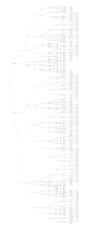

In [112]:
plot_tree(xgb_model, rankdir='LR')
plt.rcParams['figure.figsize'] = [40, 10]
plt.show()

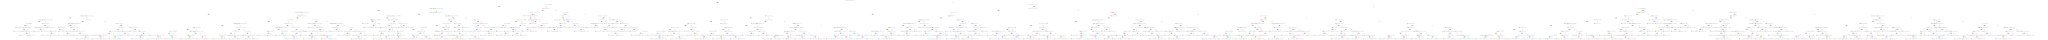

In [113]:
image = xgboost.to_graphviz(xgb_model)
image

In [111]:
fig = plt.gcf()
fig.set_size_inches(150, 100)

<Figure size 10800x7200 with 0 Axes>

In [106]:
train_data_scaled.drop(columns=['predict_xgb_price_per_size', '100-MAPE']).columns

Index(['number_of_units_total', 'net_area', 'number_of_units', 'age',
       'subway_index', 'min_subway_distance', 'culture', 'department_store',
       'mart', 'cafe', 'convenience', '빌딩_5000', '상가_100', '상가_200',
       '강남역_소요시간', '시청역_소요시간', '여의도역_소요시간', 'number_of_rooms',
       'number_of_bathrooms', 'close_apt_price_growth', '개발지구_6000'],
      dtype='object')

In [67]:
final_data_addr.groupby(final_data_addr['province_name'])['100-MAPE_RDF'].mean()

province_name
경기도      89.485559
서울특별시    92.407984
인천광역시    88.256039
Name: 100-MAPE_RDF, dtype: float64

In [189]:
final_data_addr[final_data_addr["city_name"] == "강남구"].sort_values( by = 'number_of_units', ascending=False).head(10)["100-MAPE_RDF"].mean()

96.83022684709984

In [53]:
final_data_addr[final_data_addr["city_name"] == "강남구"].sort_values( by = 'number_of_units', ascending=False).head(10)["100-MAPE_RDF"].mean()

95.90181277229036

In [54]:
final_data_addr[final_data_addr["city_name"] == "강남구"].sort_values( by = '100-MAPE_RDF', ascending=False).head(10)["100-MAPE_RDF"].mean()

99.94162667293224

In [64]:
final_data_addr[final_data_addr["city_name"] == "강남구"].sort_values( by = '100-MAPE_RDF', ascending=False)[['province_name', 'city_name', 'district_name', 'search_name', 'number_of_units' , 'rent_per_size','100-MAPE_RDF', 'predict_xgb_price_per_size']].head(10)

,province_name,city_name,district_name,search_name,number_of_units,rent_per_size,100-MAPE_RDF,predict_xgb_price_per_size
9274,서울특별시,강남구,삼성동,삼성센트럴아이파크,20.0,5088.313860,99.994759,5088.580521
9244,서울특별시,강남구,삼성동,삼부,14.0,3327.413186,99.978389,3328.132267
9376,서울특별시,강남구,대치동,쌍용2차,140.0,3289.166056,99.959664,3290.492765
9160,서울특별시,강남구,청담동,청담우방,17.0,3932.213932,99.955780,3930.475097
9385,서울특별시,강남구,대치동,대치아이파크,144.0,5738.443717,99.937977,5742.002856
9003,서울특별시,강남구,역삼동,개나리래미안,40.0,4074.927581,99.937437,4072.378193
9153,서울특별시,강남구,청담동,청담E편한세상2차,30.0,4144.420723,99.918970,4147.778965
9562,서울특별시,강남구,압구정동,한양1차,11.0,3642.573790,99.915772,3639.505720
9343,서울특별시,강남구,삼성동,삼성래미안1차301~303동,31.0,3908.916309,99.914579,3912.255355
8978,서울특별시,강남구,역삼동,역삼자이,53.0,5786.088098,99.902939,5791.704105


In [65]:
final_data_addr[final_data_addr["city_name"] == "강남구"].sort_values( by = 'number_of_units', ascending=False)[['province_name', 'city_name', 'district_name', 'search_name', 'number_of_units' , 'rent_per_size','100-MAPE_RDF', 'predict_xgb_price_per_size']].head(10)

,province_name,city_name,district_name,search_name,number_of_units,rent_per_size,100-MAPE_RDF,predict_xgb_price_per_size
9398,서울특별시,강남구,대치동,은마,2674.0,3443.974476,92.269620,3710.206773
9399,서울특별시,강남구,대치동,은마,1750.0,3621.759002,97.336162,3718.236787
9577,서울특별시,강남구,압구정동,신현대,702.0,2884.364208,97.024815,2970.179381
9646,서울특별시,강남구,일원동,일원우성7차,688.0,3357.530470,98.793087,3398.052933
9811,서울특별시,강남구,도곡동,역삼럭키,674.0,3644.144564,95.299302,3472.844329
9840,서울특별시,강남구,도곡동,도곡렉슬,673.0,6320.626691,97.714978,6176.198989
9092,서울특별시,강남구,개포동,대치,640.0,3623.819413,99.284861,3597.904066
9350,서울특별시,강남구,삼성동,삼성힐스테이트2단지,640.0,5004.007925,93.961493,5306.175295
9411,서울특별시,강남구,대치동,대치래미안팰리스1단지,608.0,8309.069081,94.080365,7817.202494
9676,서울특별시,강남구,수서동,삼성,582.0,3793.268654,93.253444,3537.353668


In [68]:
final_data_addr[final_data_addr["district_name"] == "압구정동"].sort_values( by = '100-MAPE_RDF', ascending=False)[['province_name', 'city_name', 'district_name', 'search_name', 'number_of_units' , 'rent_per_size','100-MAPE_RDF', 'predict_xgb_price_per_size']].head(10)

,province_name,city_name,district_name,search_name,number_of_units,rent_per_size,100-MAPE_RDF,predict_xgb_price_per_size
9562,서울특별시,강남구,압구정동,한양1차,11.0,3642.573790,99.915772,3639.505720
9533,서울특별시,강남구,압구정동,현대사원,234.0,3374.531265,99.745377,3383.123611
9582,서울특별시,강남구,압구정동,신현대,156.0,2764.845419,99.588863,2776.212732
9587,서울특별시,강남구,압구정동,미성1차,112.0,3080.659857,99.442378,3063.481424
9570,서울특별시,강남구,압구정동,현대1차,300.0,3341.553725,99.273969,3317.293019
9571,서울특별시,강남구,압구정동,한양3차,200.0,2960.152013,99.065488,2932.489031
9583,서울특별시,강남구,압구정동,신현대,130.0,2747.910882,98.976468,2776.036636
9573,서울특별시,강남구,압구정동,한양3차,8.0,2856.782417,98.873625,2888.960495
9564,서울특별시,강남구,압구정동,한양1차,12.0,3449.877560,98.838677,3409.813337
9541,서울특별시,강남구,압구정동,한양7차,66.0,2944.083333,98.811156,2909.082765


In [66]:
final_data_addr[final_data_addr["district_name"] == "압구정동"].sort_values( by = 'number_of_units', ascending=False)[['province_name', 'city_name', 'district_name', 'search_name', 'number_of_units' , 'rent_per_size','100-MAPE_RDF', 'predict_xgb_price_per_size']].head(10)

,province_name,city_name,district_name,search_name,number_of_units,rent_per_size,100-MAPE_RDF,predict_xgb_price_per_size
9577,서울특별시,강남구,압구정동,신현대,702.0,2884.364208,97.024815,2970.179381
9545,서울특별시,강남구,압구정동,현대7차,560.0,3610.687500,89.013647,3214.004642
9542,서울특별시,강남구,압구정동,미성2차,459.0,4110.014953,87.764357,3607.128212
9534,서울특별시,강남구,압구정동,현대3차,432.0,3405.960303,98.694852,3361.507472
9546,서울특별시,강남구,압구정동,현대7차,420.0,3518.803937,90.622172,3188.816545
9532,서울특별시,강남구,압구정동,현대사원,388.0,4181.829695,86.441275,3614.826909
9535,서울특별시,강남구,압구정동,현대8차,371.0,2687.255551,83.288608,3136.333360
9560,서울특별시,강남구,압구정동,한양1차,313.0,3959.488845,95.027736,3762.612616
9585,서울특별시,강남구,압구정동,신현대,312.0,2793.722671,98.792679,2759.993469
9570,서울특별시,강남구,압구정동,현대1차,300.0,3341.553725,99.273969,3317.293019


In [67]:
final_data_addr[final_data_addr["district_name"] == "잠실동"].sort_values( by = 'number_of_units', ascending=False)[['province_name', 'city_name', 'district_name', 'search_name', 'number_of_units' , 'rent_per_size','100-MAPE_RDF', 'predict_xgb_price_per_size']].head(10)

,province_name,city_name,district_name,search_name,number_of_units,rent_per_size,100-MAPE_RDF,predict_xgb_price_per_size
9905,서울특별시,송파구,잠실동,리센츠,3590.0,5387.118749,97.316759,5531.668145
9898,서울특별시,송파구,잠실동,잠실엘스,2938.0,5067.830778,96.151781,5262.852026
9864,서울특별시,송파구,잠실동,잠실주공5단지,2280.0,2549.892993,92.631783,2737.774644
9873,서울특별시,송파구,잠실동,트리지움,1404.0,5066.038548,98.317665,5151.266279
9866,서울특별시,송파구,잠실동,잠실주공5단지,1350.0,2423.948521,87.874315,2717.868881
9895,서울특별시,송파구,잠실동,잠실엘스,1150.0,5880.890070,99.921495,5885.506870
9853,서울특별시,송파구,잠실동,레이크팰리스,1012.0,4774.329905,93.795405,5070.557749
9868,서울특별시,송파구,잠실동,"우성1,2,3차",810.0,2992.821392,96.040249,3111.329655
9872,서울특별시,송파구,잠실동,트리지움,740.0,5851.924015,96.322410,5636.714267
9900,서울특별시,송파구,잠실동,리센츠,730.0,5149.487985,99.137270,5105.061786


In [71]:
region_list =[]
mean_list = []

for i in final_data_addr["province_name"].unique():
    
    region_list.append(i)
    mean_list.append(final_data_addr[final_data_addr["province_name"] == i].sort_values( by = '100-MAPE_RDF', ascending=False).head(10)[to_be_list].mean().values)
    
region_mean_p = pd.concat([pd.DataFrame(region_list, columns=["region"]),pd.DataFrame(mean_list, columns=to_be_list)], axis=1)
region_mean_p

,region,academy,harmful_facility,subway,culture,department_store,mart,cafe,convenience,hospital,pharmacy,빌딩_5000,상가_100,상가_200,학교_3000,학교_500,도서관_3000
0,서울특별시,723.1,117.0,3.3,112.2,12.3,114.1,54.1,20.5,147.4,13.7,6529.6,7.7,10.3,352.3,26.0,133.5
1,인천광역시,332.3,57.4,1.5,16.5,2.2,63.4,35.4,15.4,72.1,7.3,1104.1,16.7,19.4,200.1,29.1,72.4
2,경기도,525.0,58.8,0.2,18.7,2.9,60.9,20.2,7.6,50.1,5.7,627.2,12.5,15.9,163.3,24.3,72.8


In [72]:
region_list =[]
mean_list = []

for i in final_data_addr["city_name"].unique():
    
    region_list.append(i)
    mean_list.append(final_data_addr[final_data_addr["city_name"] == i].sort_values( by = '100-MAPE_RDF', ascending=False).head(10)[to_be_list].mean().values)
    
region_mean_c = pd.concat([pd.DataFrame(region_list, columns=["region"]),pd.DataFrame(mean_list, columns=to_be_list)], axis=1)
region_mean_c

,region,academy,harmful_facility,subway,culture,department_store,mart,cafe,convenience,hospital,pharmacy,빌딩_5000,상가_100,상가_200,학교_3000,학교_500,도서관_3000
0,종로구,298.2,119.8,3.3,434.9,12.3,90.3,89.8,15.6,90.6,11.0,5024.1,7.4,11.7,435.3,40.3,141.7
1,중구,354.2,174.1,6.6,428.2,12.7,84.0,110.1,29.6,108.5,13.2,4873.0,6.3,8.9,414.3,28.8,138.0
2,용산구,285.5,67.1,4.7,178.1,15.8,136.8,66.0,15.6,87.8,9.5,8379.2,3.0,4.1,277.1,15.5,95.1
3,성동구,468.3,69.2,4.1,229.1,16.7,118.2,41.2,15.1,128.5,10.7,11772.1,25.2,29.6,536.0,53.6,186.8
4,광진구,588.0,62.7,2.6,122.8,13.8,134.7,66.6,23.6,139.0,11.4,8175.4,10.3,12.4,356.2,38.1,110.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,포천시,59.5,32.3,0.0,3.5,0.0,18.9,22.8,9.9,20.9,4.0,57.9,4.7,5.4,33.1,11.4,14.2
71,여주시,53.2,16.0,0.1,8.3,0.0,5.1,6.3,4.0,6.8,1.7,31.5,2.2,2.9,31.3,5.8,8.8
72,연천군,41.0,29.0,0.0,3.0,0.0,3.0,16.0,7.6,7.0,4.1,11.0,1.3,1.7,16.9,3.7,7.3
73,가평군,29.6,13.7,0.7,3.6,0.0,1.6,6.9,4.8,4.0,0.4,7.5,0.3,0.3,8.8,2.7,5.4


In [76]:
region_list =[]
mean_list = []

for i in final_data_addr["city_name"].unique():
    
    region_list.append(i)
    mean_list.append(final_data_addr[final_data_addr["city_name"] == i].sort_values( by = 'number_of_units', ascending=False).head(10)[to_be_list].mean().values)
    
region_mean_c1 = pd.concat([pd.DataFrame(region_list, columns=["region"]),pd.DataFrame(mean_list, columns=to_be_list)], axis=1)
region_mean_c1

,region,academy,harmful_facility,subway,culture,department_store,mart,cafe,convenience,hospital,pharmacy,빌딩_5000,상가_100,상가_200,학교_3000,학교_500,도서관_3000
0,종로구,392.9,112.1,3.6,501.1,13.2,93.6,50.8,15.1,90.2,12.0,7170.6,9.3,12.4,693.9,91.4,234.2
1,중구,112.2,23.0,1.0,52.4,3.5,33.4,9.7,7.1,37.5,3.0,3354.6,12.2,13.2,188.7,20.8,59.4
2,용산구,342.2,51.0,4.0,139.9,17.9,130.4,21.7,8.1,107.3,5.7,14211.9,29.4,38.7,583.4,44.4,221.6
3,성동구,515.2,76.8,4.7,164.7,16.2,109.3,30.1,12.7,147.0,8.4,14587.3,41.7,47.1,761.7,82.3,270.5
4,광진구,544.9,30.7,1.3,73.8,13.5,125.8,39.3,14.9,109.0,10.8,8923.3,18.1,19.9,404.5,47.1,147.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,포천시,62.5,32.7,0.0,1.6,0.0,19.7,12.6,6.8,20.5,1.7,73.5,8.4,9.3,37.4,16.5,15.0
71,여주시,60.3,16.9,0.0,8.7,0.0,5.3,8.8,6.3,6.0,2.1,31.3,3.1,3.1,26.3,4.3,8.7
72,연천군,41.0,29.0,0.0,3.0,0.0,3.0,17.8,8.8,7.8,5.2,11.0,1.1,1.6,17.3,2.7,7.3
73,가평군,32.1,14.2,0.8,2.3,0.0,1.5,10.3,4.8,4.7,1.6,6.8,1.0,1.0,9.2,4.3,5.0


In [75]:
region_mean_c[region_mean_c.region == '강남구']

,region,academy,harmful_facility,subway,culture,department_store,mart,cafe,convenience,hospital,pharmacy,빌딩_5000,상가_100,상가_200,학교_3000,학교_500,도서관_3000
22,강남구,1186.2,200.4,3.9,224.5,14.5,141.9,70.0,19.2,222.9,12.0,10188.6,10.0,11.5,339.8,26.7,95.3


In [77]:
region_mean_c1[region_mean_c1.region == '강남구']

,region,academy,harmful_facility,subway,culture,department_store,mart,cafe,convenience,hospital,pharmacy,빌딩_5000,상가_100,상가_200,학교_3000,학교_500,도서관_3000
22,강남구,1194.2,116.5,3.6,149.2,12.7,134.5,44.1,15.2,169.4,14.1,12081.1,26.1,32.4,472.4,65.4,151.2


In [73]:
region_list =[]
mean_list = []

for i in final_data_addr["district_name"].unique():
    
    region_list.append(i)
    mean_list.append(final_data_addr[final_data_addr["district_name"] == i].sort_values( by = '100-MAPE_RDF', ascending=False).head(10)[to_be_list].mean().values)
    
region_mean_d = pd.concat([pd.DataFrame(region_list, columns=["region"]),pd.DataFrame(mean_list, columns=to_be_list)], axis=1)
region_mean_d

,region,academy,harmful_facility,subway,culture,department_store,mart,cafe,convenience,hospital,pharmacy,빌딩_5000,상가_100,상가_200,학교_3000,학교_500,도서관_3000
0,청운동,223.25,24.875,0.0,435.250000,10.625,97.875,19.125000,2.625000,47.625,0.0,4223.5,0.625000,0.625000,301.75,15.875000,100.0
1,사직동,362.00,158.000,4.0,489.000000,12.000,95.000,141.000000,16.000000,108.000,7.0,6958.0,4.000000,5.000000,629.00,87.000000,193.0
2,내수동,372.90,179.300,3.2,610.600000,13.100,96.500,204.100000,21.800000,131.000,10.3,5759.3,2.400000,2.900000,479.10,32.300000,147.9
3,견지동,323.00,295.000,10.0,757.000000,15.000,97.000,367.000000,45.000000,176.000,30.0,5010.0,0.000000,1.000000,441.00,10.000000,148.0
4,익선동,313.00,309.000,7.0,760.000000,15.000,101.000,264.000000,24.000000,98.000,10.0,5270.0,6.000000,22.000000,499.00,39.000000,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,양평읍 백안리,48.50,20.500,0.0,4.000000,0.000,7.000,4.000000,3.000000,2.000,0.0,23.0,1.000000,1.000000,20.00,2.000000,6.0
807,강상면 병산리,65.00,29.200,0.0,6.400000,0.000,7.600,3.000000,2.600000,2.400,0.0,25.0,0.800000,0.800000,23.00,1.000000,7.0
808,양서면 양수리,12.00,7.000,0.4,2.000000,0.000,1.400,18.600000,3.000000,3.000,4.0,3.4,0.000000,0.000000,17.00,0.400000,5.0
809,용문면 마룡리,36.00,13.000,0.0,3.000000,0.000,2.000,2.000000,0.000000,0.000,0.0,10.0,0.000000,0.000000,10.00,0.000000,3.0
